In [2]:
# import contingencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# # import csv files
# pres = pd.read_csv('p_all.csv')
# bgc = pd.read_csv('b_all.csv')
# stategroups = pd.read_csv('stategroups.csv')

In [4]:
pres = pd.read_csv("Cleanup/p_all.csv")
bgc = pd.read_csv("Cleanup/b_all.csv")
stategroups = pd.read_csv("Cleanup/stategroups.csv")

In [5]:
# claen up df and merge tables
pres = pres.loc[pres['State'] !='Total']
bgc = bgc.rename(columns={'state' : 'State', 'year':'Year'})

compare = bgc.merge(pres,"outer")
compare

,State,Year,totals,pct,Republican,Democratic,Others,Election,PercentD,Dem Win,Change
0,AL,2000,221911,3.729423,941173.0,692611.0,32488.0,Pres,41.566503,False,NaN
1,AL,2001,230187,-3.987627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,2002,221008,2.023004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,2003,225479,2.003734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,2004,229997,2.554816,1176394.0,693933.0,13122.0,Pres,36.843737,False,-4.722766
...,...,...,...,...,...,...,...,...,...,...,...
1035,Total,2015,23006970,0.103940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,Total,2016,27406424,0.191223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,Total,2017,24933924,-0.090216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,Total,2018,25736693,0.032196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
compare = compare.dropna(thresh = 7)
compare

,State,Year,totals,pct,Republican,Democratic,Others,Election,PercentD,Dem Win,Change
0,AL,2000,221911,3.729423,941173.0,692611.0,32488.0,Pres,41.566503,False,NaN
4,AL,2004,229997,2.554816,1176394.0,693933.0,13122.0,Pres,36.843737,False,-4.722766
8,AL,2008,299432,6.156991,1266546.0,813479.0,19794.0,Pres,38.740434,False,1.896697
12,AL,2012,431356,30.722651,1255925.0,795696.0,22717.0,Pres,38.359033,False,-0.381401
16,AL,2016,616947,-22.627876,1318255.0,729547.0,75570.0,Pres,34.357946,False,-4.001087
...,...,...,...,...,...,...,...,...,...,...,...
1000,WY,2000,34295,0.463624,147947.0,60481.0,9923.0,Pres,27.698980,False,NaN
1004,WY,2004,35427,7.011601,167629.0,70776.0,5023.0,Pres,29.074716,False,1.375736
1008,WY,2008,49255,4.344737,164958.0,82868.0,6832.0,Pres,32.540898,False,3.466182
1012,WY,2012,63356,11.545868,170962.0,69286.0,8813.0,Pres,27.818888,False,-4.722010


In [8]:
blue_states = stategroups.loc[stategroups['Group'] == 'Blue']
blue_states_df = pd.DataFrame(blue_states)

In [9]:
swing_states = stategroups.loc[stategroups['Group'] == 'Swing']
swing_states_df = pd.DataFrame(swing_states)

In [12]:
blue_results = compare.merge(blue_states)
blue_results

,State,Year,totals,pct,Republican,Democratic,Others,Election,PercentD,Dem Win,Change,Dem Wins,Group
0,CA,2000,794506,7.559792,4567429.0,5861203.0,537224.0,Pres,53.449571,True,NaN,5.0,Blue
1,CA,2004,548843,11.329105,5509826.0,6745485.0,166541.0,Pres,54.303376,True,0.853805,5.0,Blue
2,CA,2008,780398,0.995133,5011781.0,8274473.0,275646.0,Pres,61.012638,True,6.709262,5.0,Blue
3,CA,2012,1132603,20.809763,4839958.0,7854285.0,344304.0,Pres,60.238959,True,-0.773679,5.0,Blue
4,CA,2016,2377167,-33.950370,4483814.0,8753792.0,943998.0,Pres,61.726389,True,1.487429,5.0,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,WA,2000,134255,20.204089,1108864.0,1247652.0,130917.0,Pres,50.158215,True,NaN,5.0,Blue
76,WA,2004,203432,7.927465,1304894.0,1510201.0,43989.0,Pres,52.821148,True,2.662933,5.0,Blue
77,WA,2008,316589,6.362508,1229216.0,1750848.0,56814.0,Pres,57.652892,True,4.831744,5.0,Blue
78,WA,2012,519209,8.072472,1290670.0,1755396.0,79450.0,Pres,56.163398,True,-1.489494,5.0,Blue


In [13]:
swing_results = compare.merge(swing_states)
swing_results

,State,Year,totals,pct,Republican,Democratic,Others,Election,PercentD,Dem Win,Change,Dem Wins,Group
0,CO,2000,307512,13.392648,883748.0,738227.0,119393.0,Pres,42.393509,False,NaN,3.0,Swing
1,CO,2004,194191,6.228919,1101255.0,1001732.0,27343.0,Pres,47.022386,False,4.628877,3.0,Swing
2,CO,2008,285521,9.848663,1073629.0,1288633.0,39200.0,Pres,53.660354,True,6.637967,3.0,Swing
3,CO,2012,414838,24.062405,1185243.0,1323102.0,61177.0,Pres,51.492145,True,-2.168208,3.0,Swing
4,CO,2016,540514,-8.051410,1202484.0,1338870.0,238893.0,Pres,48.156513,True,-3.335633,3.0,Swing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,WI,2000,180492,0.723578,1237279.0,1242987.0,118341.0,Pres,47.832820,True,NaN,4.0,Swing
61,WI,2004,187097,-2.182825,1478120.0,1489504.0,29383.0,Pres,49.699717,True,1.866897,4.0,Swing
62,WI,2008,186819,5.423431,1262393.0,1677211.0,43813.0,Pres,56.217787,True,6.518069,4.0,Swing
63,WI,2012,469375,-7.390040,1407966.0,1620985.0,39483.0,Pres,52.827762,True,-3.390025,4.0,Swing


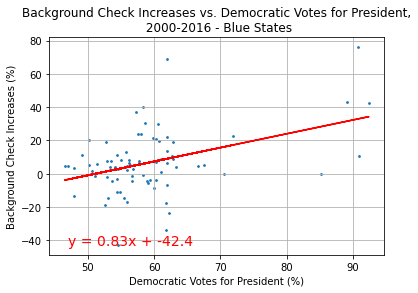

The r-squared is 0.17424172787005654


In [15]:
x_values = blue_results["PercentD"]
y_values = blue_results["pct"]

plt.scatter(blue_results["PercentD"],blue_results["pct"],s=3)
plt.title("Background Check Increases vs. Democratic Votes for President,\n 2000-2016 - Blue States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democratic Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()
print(f"The r-squared is {r_value * r_value}")

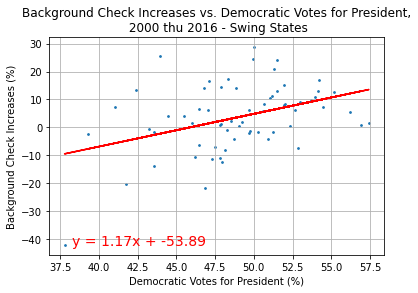

The r-squared is 0.15762105864156795


In [17]:
x_values = swing_results["PercentD"]
y_values = swing_results["pct"]

plt.scatter(swing_results["PercentD"],swing_results["pct"],s=3)
plt.title("Background Check Increases vs. Democratic Votes for President,\n 2000 thu 2016 - Swing States")
plt.ylabel("Background Check Increases (%)")
plt.xlabel("Democratic Votes for President (%)")
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
plt.plot(x_values, intercept + slope*x_values, 'r')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(min(x_values)+0.5,min(y_values)),fontsize=14,color="red")
plt.show()
print(f"The r-squared is {r_value * r_value}")